<a href="https://colab.research.google.com/github/MahamadSahjad/House_Price_Prediction/blob/main/Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
n_customers = 500

In [3]:
ages = np.random.randint(18,70,n_customers)
genders = np.random.randint(0,2,n_customers)
income = np.random.normal(50,15,n_customers)
purchase_freq = np.random.poisson(3,n_customers)

churn = ((income < 40) & (purchase_freq < 3)).astype(int)

In [4]:
df_customer = pd.DataFrame({
    'Age': ages,
    'Gender':genders,
    'Income':income,
    'Purchase_Frequency':purchase_freq,
    'churn':churn

})

In [5]:
df_customer.to_csv("customer.csv",index = False)
print("Customer data created and saved to 'customer.csv'")

Customer data created and saved to 'customer.csv'


In [6]:
print(df_customer.head())

   Age  Gender     Income  Purchase_Frequency  churn
0   56       1  24.449263                   2      1
1   69       0  49.166785                   2      0
2   46       0  55.760982                   4      0
3   32       1  49.509579                   4      0
4   60       0  18.988368                   1      1


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [10]:
df =pd.read_csv("customer.csv")
df.head()

,Age,Gender,Income,Purchase_Frequency,churn
0,56,1,24.449263,2,1
1,69,0,49.166785,2,0
2,46,0,55.760982,4,0
3,32,1,49.509579,4,0
4,60,0,18.988368,1,1


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Purchase_Frequency'].plot(kind='hist', bins=20, title='Purchase_Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Gender', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Income', y='Purchase_Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Purchase_Frequency', y='churn', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Income'].plot(kind='line', figsize=(8, 4), title='Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Purchase_Frequency'].plot(kind='line', figsize=(8, 4), title='Purchase_Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Gender              500 non-null    int64  
 2   Income              500 non-null    float64
 3   Purchase_Frequency  500 non-null    int64  
 4   churn               500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Gender,0
Income,0
Purchase_Frequency,0
churn,0


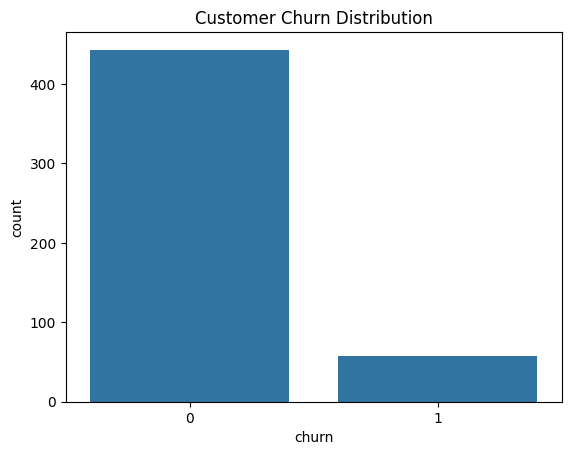

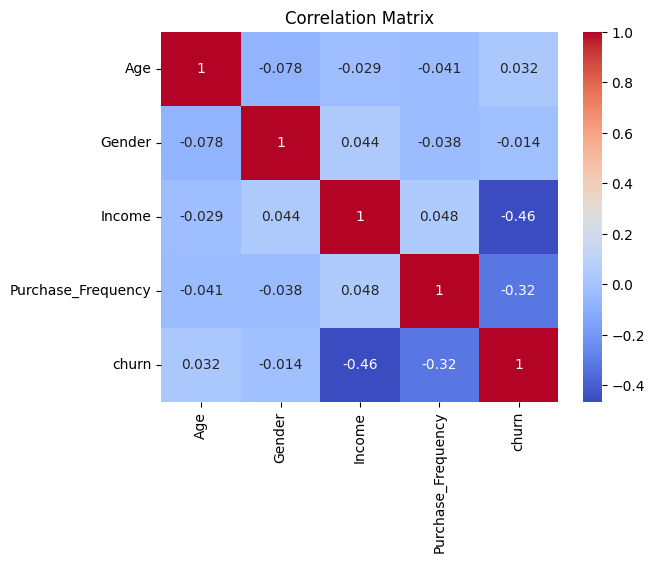

In [19]:
sns.countplot(data = df,x ='churn')
plt.title("Customer Churn Distribution")
plt.show()

sns.heatmap(df.corr(), annot = True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [16]:
x = df.drop("churn",axis =1)
y = df["churn"]

x_train , x_test , y_train , y_test = train_test_split(
    x , y , test_size = 0.2, random_state =42
)

model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

Accuracy Score: 0.91
Confusion Matrix:
 [[85  2]
 [ 7  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



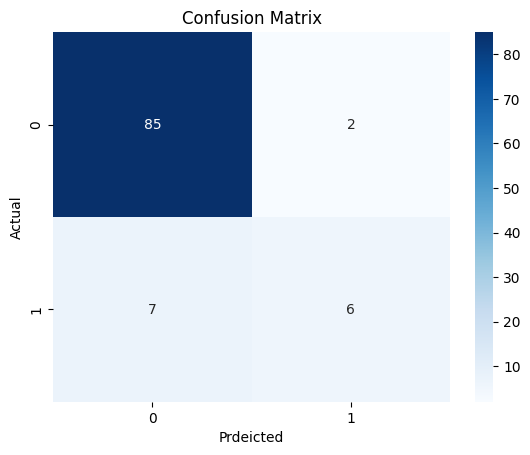

In [18]:
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

print("Classification Report:\n",classification_report(y_test,y_pred))

sns.heatmap(cm,annot = True , fmt ='d',cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prdeicted")
plt.ylabel("Actual")
plt.show()




In [26]:
new_customer = pd.DataFrame({
    'Age': [21],
    'Gender': [1],
    'Income': [50],
    'Purchase_Frequency': [2]
})

prediction = model.predict(new_customer)[0]

if prediction == 1:
    print("This customer is likely to CHURN. Consider offering benefits.")
else:
    print("This customer is likely to Stay. Continue engagement and provide updates.")

This customer is likely to Stay. Continue engagement and provide updates.
